# NSW vs OSW

## Introduction

In this test we will t-test the projection that we are doing for NSW vs OSW projection

## Config

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys 

sys.path.append('c:/Users/Jordi Cremades/Documents/Repos/central-node')

from utils import query_engines
from statsmodels.stats.proportion import proportions_ztest

## Collect data

In [23]:
df = pd.read_csv('outputs/data.csv')

df['p_creation_month'] = pd.to_datetime(df['p_creation_month'], format='%Y-%m')
df['p_creation_date'] = pd.to_datetime(df['p_creation_date'])

## 1) T-test Groceries April NC

In [31]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Groceries'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-05-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'gnc_sw_sessions'
SESSIONS_OE = 'gnc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
115,2024-04-13,UA,Control Group,400,51
122,2024-04-23,SI,Variant 1,219,7
177,2024-04-30,ES,Variant 1,10135,898
205,2024-04-05,NG,Variant 1,1435,142
216,2024-04-19,MA,Control Group,508,47


Z-Statistic: -2.0614
P-Value: 0.0393
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.0979
Expected value for Control group: 0.0996
Expected mean difference for one extra session: -0.0017
The expected mean difference for one extra session is larger for the Control group.


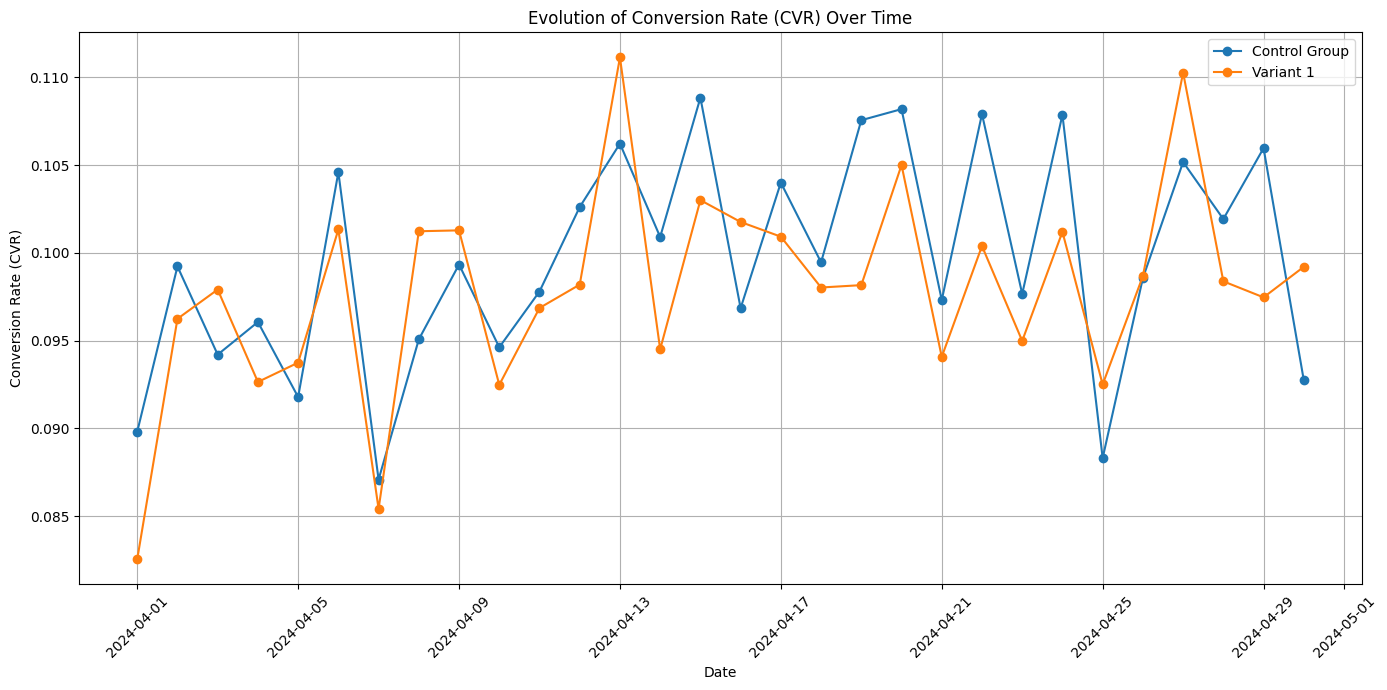

In [32]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 2) T-test Groceries April RC

In [33]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Groceries'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-05-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'grc_sw_sessions'
SESSIONS_OE = 'grc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
115,2024-04-13,UA,Control Group,1335,617
122,2024-04-23,SI,Variant 1,91,19
177,2024-04-30,ES,Variant 1,32426,15967
205,2024-04-05,NG,Variant 1,2511,697
216,2024-04-19,MA,Control Group,1426,617


Z-Statistic: 3.9363
P-Value: 0.0001
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.4365
Expected value for Control group: 0.4334
Expected mean difference for one extra session: 0.0031
The expected mean difference for one extra session is larger for the Variant group.


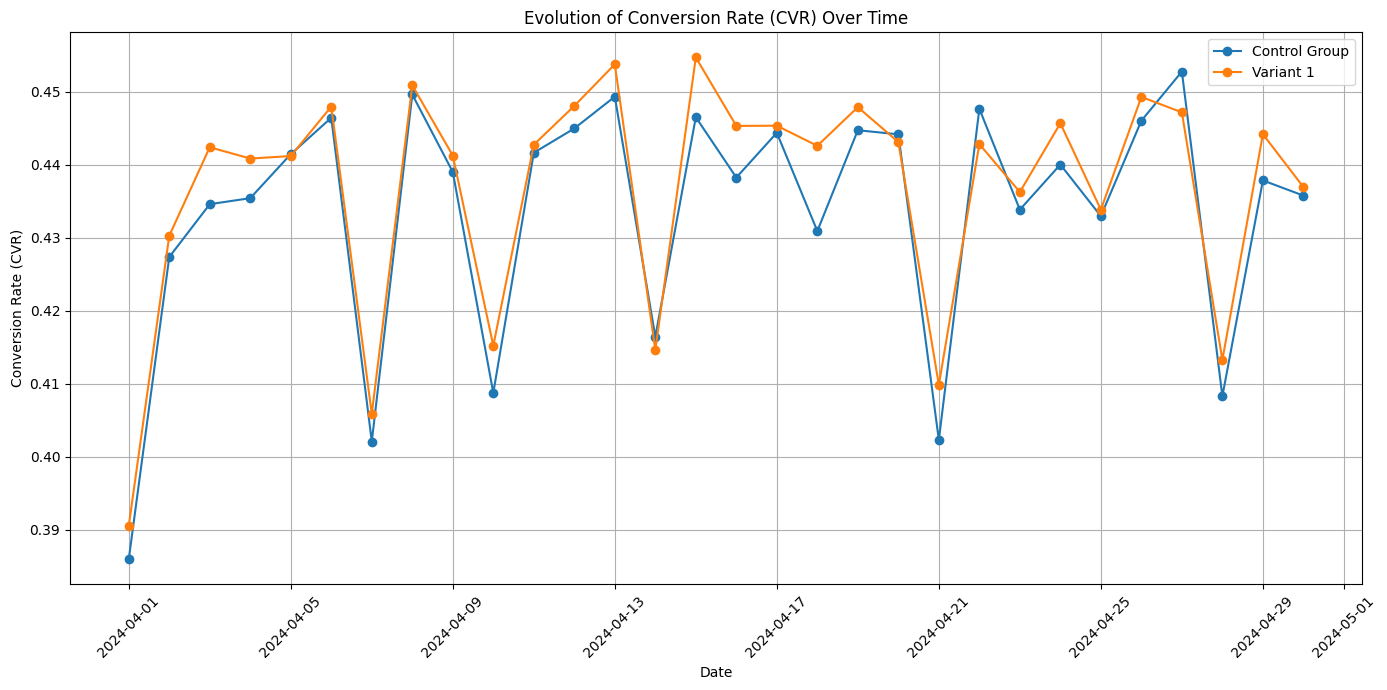

In [34]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3) T-test Shops 3M NC

In [35]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Shops'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-07-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'gnc_sw_sessions'
SESSIONS_OE = 'gnc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
13,2024-06-09,ES,Control Group,588,6
51,2024-04-30,PT,Control Group,236,7
87,2024-06-22,CI,Variant 1,234,1
95,2024-04-24,IT,Variant 1,3033,30
131,2024-06-03,ES,Variant 1,2892,115


Z-Statistic: 2.5835
P-Value: 0.0098
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.0174
Expected value for Control group: 0.0167
Expected mean difference for one extra session: 0.0007
The expected mean difference for one extra session is larger for the Variant group.


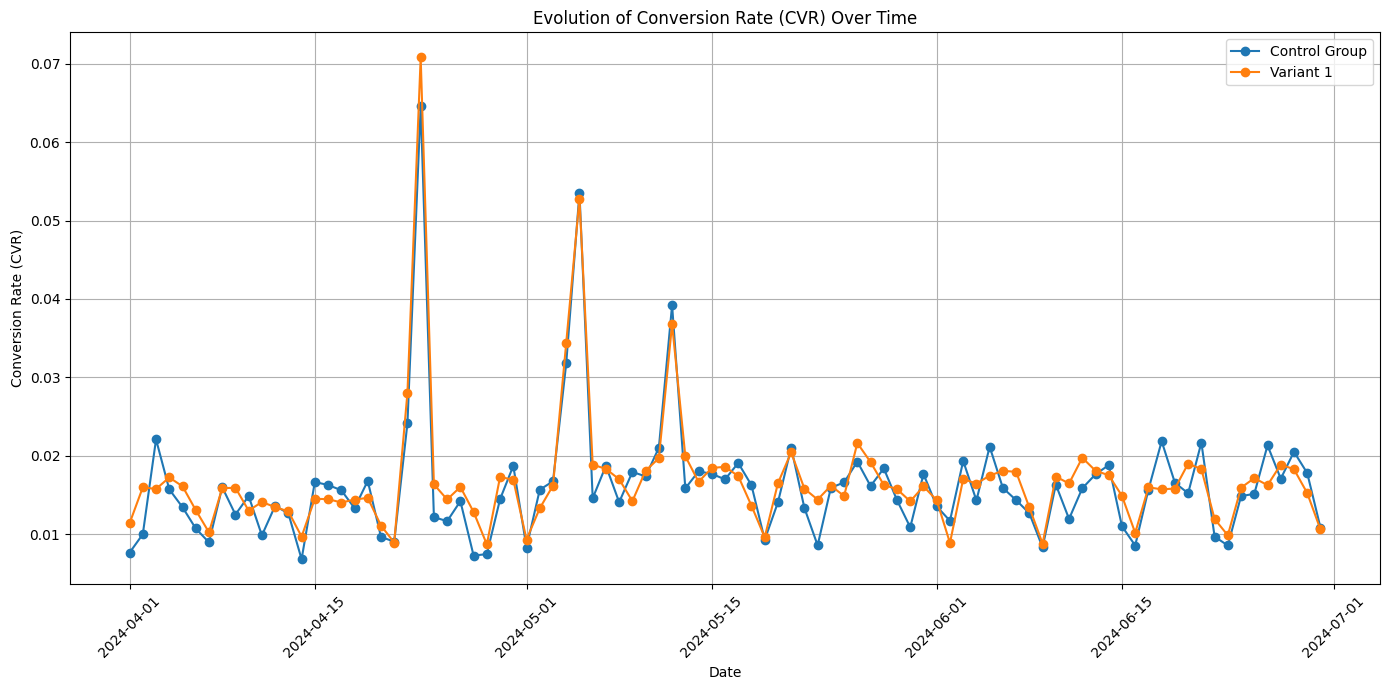

In [36]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 4) T-test Shops 3M RC

In [37]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Shops'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-07-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'grc_sw_sessions'
SESSIONS_OE = 'grc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
13,2024-06-09,ES,Control Group,593,30
51,2024-04-30,PT,Control Group,598,25
87,2024-06-22,CI,Variant 1,251,4
95,2024-04-24,IT,Variant 1,1672,88
131,2024-06-03,ES,Variant 1,4066,410


Z-Statistic: 3.9628
P-Value: 0.0001
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.0469
Expected value for Control group: 0.0454
Expected mean difference for one extra session: 0.0015
The expected mean difference for one extra session is larger for the Variant group.


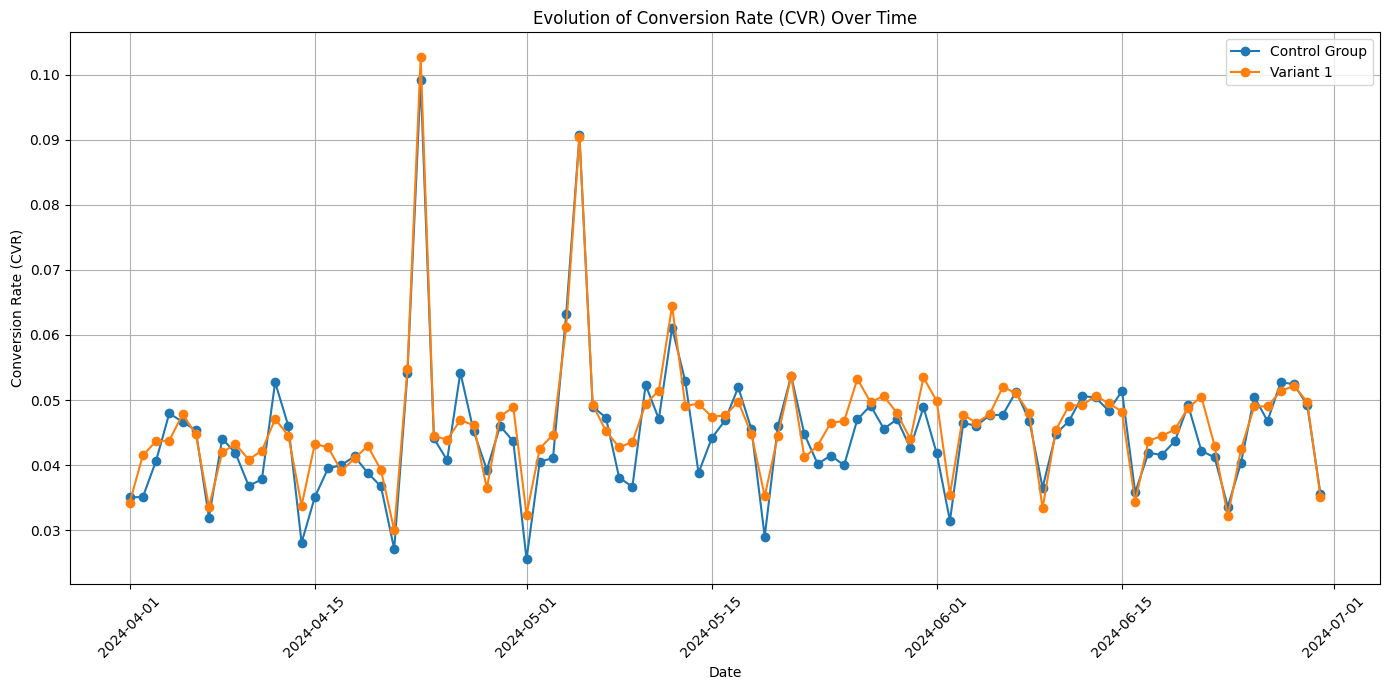

In [38]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 5) T-test Health 3M NC

In [42]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Health'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-07-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'gnc_sw_sessions'
SESSIONS_OE = 'gnc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
31,2024-05-26,HR,Variant 1,310,1
33,2024-04-27,KE,Control Group,17,2
40,2024-05-27,BG,Variant 1,28,2
66,2024-05-12,IT,Control Group,177,6
94,2024-04-15,GH,Variant 1,220,27


Z-Statistic: 2.3835
P-Value: 0.0171
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.0794
Expected value for Control group: 0.0773
Expected mean difference for one extra session: 0.0021
The expected mean difference for one extra session is larger for the Variant group.


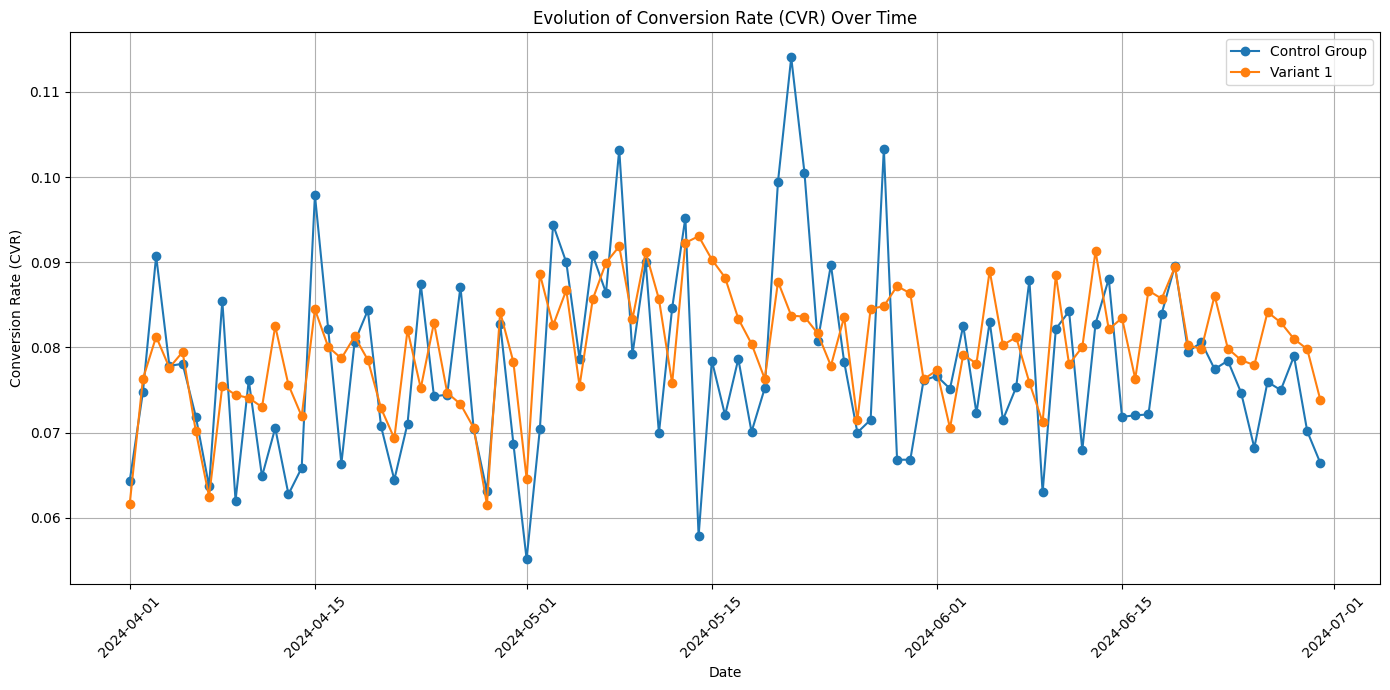

In [43]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 6) T-test Health 3M RC

In [44]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Health'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-07-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'grc_sw_sessions'
SESSIONS_OE = 'grc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
31,2024-05-26,HR,Variant 1,344,15
33,2024-04-27,KE,Control Group,25,3
40,2024-05-27,BG,Variant 1,39,2
66,2024-05-12,IT,Control Group,132,17
94,2024-04-15,GH,Variant 1,122,29


Z-Statistic: 2.5956
P-Value: 0.0094
The difference in conversion rates is statistically significant.
Expected value for Variant group: 0.2166
Expected value for Control group: 0.2133
Expected mean difference for one extra session: 0.0033
The expected mean difference for one extra session is larger for the Variant group.


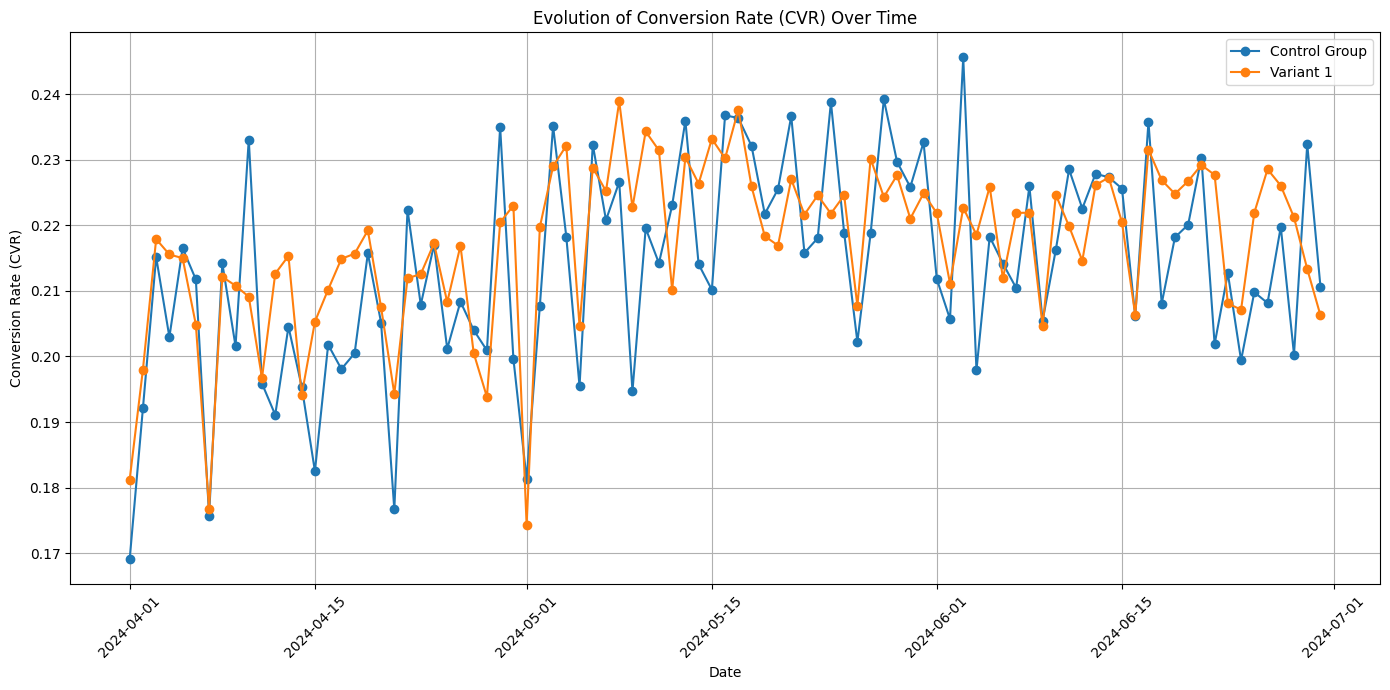

In [45]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 7) Extra T-test Groceries April - June NC

In [46]:
tmp = df.copy()

COND = tmp['category_tag'] == 'Groceries'
COND2 = tmp['p_creation_date'] >= '2024-04-01'
COND3 = tmp['p_creation_date'] < '2024-07-01'
COND4 = tmp['variant'].isin(['Control Group','Variant 1'])
SESSION_SW = 'gnc_sw_sessions'
SESSIONS_OE = 'gnc_oe_sessions'

tmp = tmp[COND & COND2 & COND3 & COND4][['p_creation_date','country','variant',SESSION_SW,SESSIONS_OE]]

tmp.rename(columns={SESSION_SW: "sessions", SESSIONS_OE: "orders"}, inplace=True)

tmp.head()

,p_creation_date,country,variant,sessions,orders
0,2024-06-27,MA,Variant 1,5479,483
1,2024-05-16,KG,Control Group,98,8
2,2024-06-15,RS,Variant 1,582,62
17,2024-05-01,UG,Control Group,81,2
29,2024-06-24,HR,Variant 1,1518,98


Z-Statistic: -1.4848
P-Value: 0.1376
The difference in conversion rates is not statistically significant.
Expected value for Variant group: 0.1014
Expected value for Control group: 0.1021
Expected mean difference for one extra session: -0.0007
The expected mean difference for one extra session is larger for the Control group.


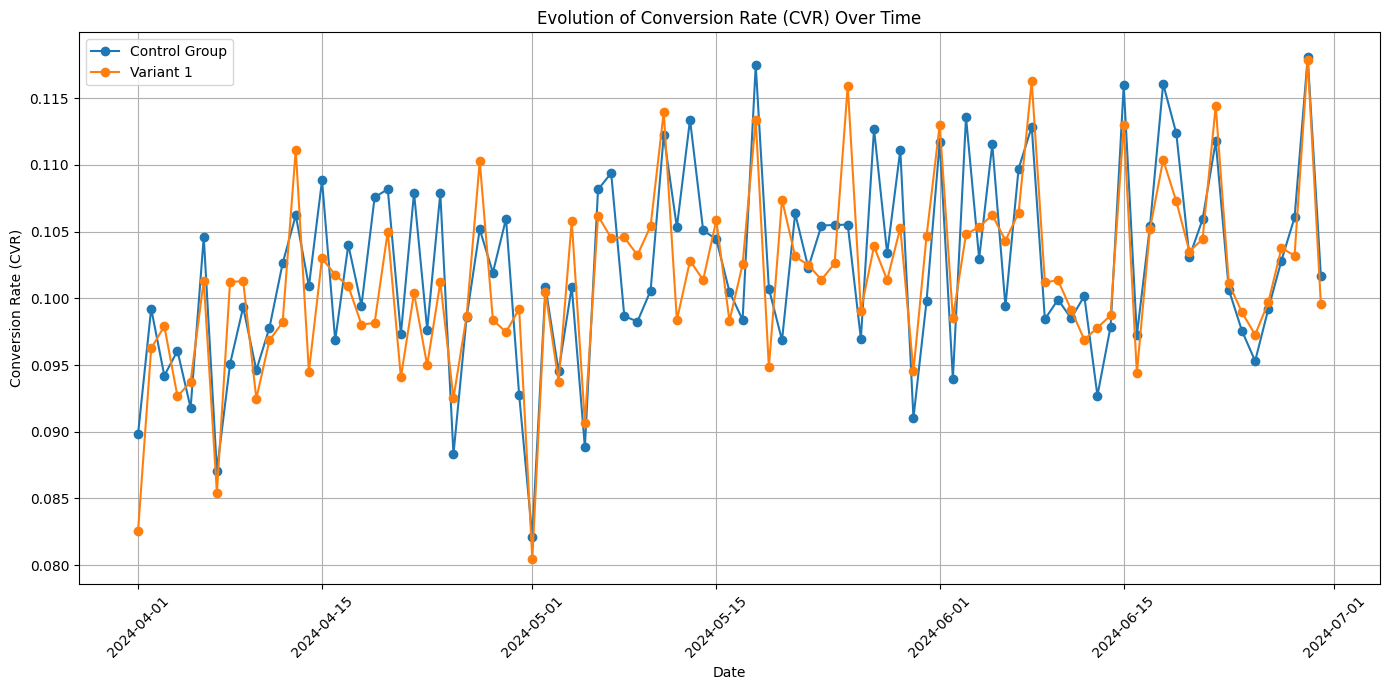

In [47]:
# Assuming tmp is your DataFrame
grouped_tmp = tmp.groupby(['p_creation_date', 'variant']).agg({
    'sessions': 'sum',
    'orders': 'sum'
}).reset_index()

# Calculate CVR
grouped_tmp['cvr'] = grouped_tmp['orders'] / grouped_tmp['sessions']

# Separate the control and variant groups
control_group = grouped_tmp[grouped_tmp['variant'] == 'Control Group']
variant_group = grouped_tmp[grouped_tmp['variant'] == 'Variant 1']

# Ensure the dates match between control and variant
merged_df = pd.merge(control_group, variant_group, on='p_creation_date', suffixes=('_control', '_variant'))

# Perform the Z-test for proportions
control_successes = merged_df['orders_control'].sum()
variant_successes = merged_df['orders_variant'].sum()
control_trials = merged_df['sessions_control'].sum()
variant_trials = merged_df['sessions_variant'].sum()

successes = np.array([variant_successes, control_successes])
trials = np.array([variant_trials, control_trials])

z_stat, p_value = proportions_ztest(successes, trials)

print(f'Z-Statistic: {z_stat:.4f}')
print(f'P-Value: {p_value:.4f}')

# Determine significance
alpha = 0.05
if p_value < alpha:
    print("The difference in conversion rates is statistically significant.")
else:
    print("The difference in conversion rates is not statistically significant.")

# Calculate the expected mean difference for one extra session in both groups
control_cvr = control_successes / control_trials
variant_cvr = variant_successes / variant_trials

# Expected orders for one extra session
expected_control_orders = control_cvr * 1
expected_variant_orders = variant_cvr * 1

# Expected mean difference
expected_mean_difference = expected_variant_orders - expected_control_orders


print(f'Expected value for Variant group: {expected_variant_orders:.4f}')
print(f'Expected value for Control group: {expected_control_orders:.4f}')
print(f'Expected mean difference for one extra session: {expected_mean_difference:.4f}')

if expected_mean_difference > 0:
    print("The expected mean difference for one extra session is larger for the Variant group.")
else:
    print("The expected mean difference for one extra session is larger for the Control group.")

# Plot the evolution of CVR over time
plt.figure(figsize=(14, 7))
plt.plot(control_group['p_creation_date'], control_group['cvr'], label='Control Group', marker='o')
plt.plot(variant_group['p_creation_date'], variant_group['cvr'], label='Variant 1', marker='o')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (CVR)')
plt.title('Evolution of Conversion Rate (CVR) Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
